<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%9E%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def fibonacci(n):
  if n<=0:
    return 0
  if n==1 or n==2:
    return 1
  return fibonacci(n-1) + fibonacci(n-2)

In [2]:
for i in range(30):
    print(fibonacci(i),end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 

In [3]:
import time

In [5]:
for i in range(35,50):
    print("#",i,end=':')
    s = time.time()
    re = fibonacci(i)
    e = time.time()
    print(f"소요시간 : {e-s:.4f} 결과 : {re}")

# 35:소요시간 : 2.7987 결과 : 9227465
# 36:소요시간 : 5.9638 결과 : 14930352
# 37:소요시간 : 7.3111 결과 : 24157817
# 38:소요시간 : 13.2506 결과 : 39088169
# 39:소요시간 : 22.0190 결과 : 63245986
# 40:소요시간 : 35.3569 결과 : 102334155
# 41:소요시간 : 57.4515 결과 : 165580141
# 42:소요시간 : 97.6970 결과 : 267914296
# 43:소요시간 : 149.7303 결과 : 433494437
# 44:소요시간 : 243.0262 결과 : 701408733
# 45:소요시간 : 392.9047 결과 : 1134903170
# 46:소요시간 : 633.7888 결과 : 1836311903
# 47:소요시간 : 1033.7125 결과 : 2971215073
# 48:소요시간 : 1656.0230 결과 : 4807526976
# 49:소요시간 : 2677.7736 결과 : 7778742049


In [ ]:
answer = [0,1,1]
def fibonacci2(n):
    if n >= len(answer):
      re = fibonacci(n-1) + fibonacci(n-2)
      answer.append(re)
    return answer[n]

## 첫 딥러닝

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## 전처리

In [11]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [12]:
import numpy as np

In [14]:
np.max(x_train), np.min(x_train)

(255, 0)

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
np.max(x_train), np.min(x_train)

(1.0, 0.0)

## 모델 생성

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()

In [19]:
model.add(layers.Input(shape = (784,)))
model.add(layers.Dense(512,activation='relu')) #회귀
model.add(layers.Dense(10,activation='softmax')) #다중 분류

In [20]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 학습

In [22]:
hist = model.fit(x_train, y_train, epochs = 100,
                 batch_size = 128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 7s 16ms/step - loss: 0.2996 - accuracy: 0.9150 - val_loss: 0.1483 - val_accuracy: 0.9581
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 0.1227 - accuracy: 0.9649 - val_loss: 0.1142 - val_accuracy: 0.9658
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 0.0811 - accuracy: 0.9764 - val_loss: 0.0998 - val_accuracy: 0.9699
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0881 - val_accuracy: 0.9732
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 0.0414 - accuracy: 0.9885 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 5s 13ms/step - loss: 0.0325 - accuracy: 0.9905 - val_loss: 0.0798 - val_accuracy: 0.9771
Epoch 7/100
375/375 [==============================] - 6s 17ms/step - loss: 0.0231 - accuracy: 0.9940 - val_loss: 0.0786 - val_accuracy:

In [23]:
import matplotlib.pyplot as plt

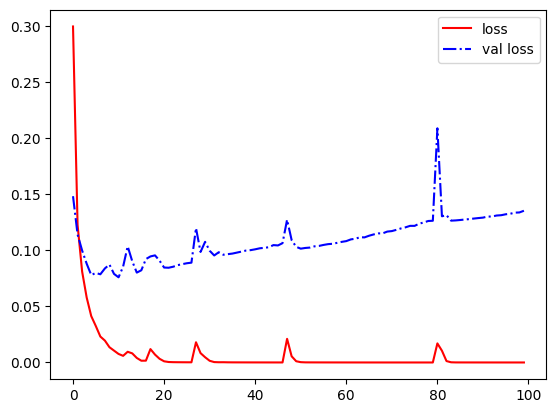

In [25]:
plt.plot(hist.history['loss'], 'r-', label = 'loss')
plt.plot(hist.history['val_loss'], 'b-.', label = 'val loss')
plt.legend()
plt.show()

## 예측 및 평가

In [26]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [27]:
pred[0], y_test[0]

(array([1.0077169e-21, 1.0058849e-21, 1.0070854e-16, 3.3367284e-14,
        2.7895522e-33, 2.8077127e-25, 3.8833621e-29, 9.9999994e-01,
        2.2440947e-18, 1.3998593e-16], dtype=float32),
 7)

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1036 - accuracy: 0.9832


[0.10358847677707672, 0.9832000136375427]

## 데이터 표현

### 스칼라 - 텐서 0

In [29]:
import numpy as np

In [30]:
x = np.array(12)
x

array(12)

In [31]:
x.ndim

0

### 벡터 텐서1

In [33]:
x = np.array([1,2,3,4])
x.ndim, x.shape

(1, (4,))

### 행렬 - 텐서2

In [34]:
x = np.array([[1,2,3],[4,5,6]])
x.ndim, x.shape

(2, (2, 3))

In [35]:
#다차원
x = np.array([[[1,2,3],[4,5,6]],
              [[1,2,3],[4,5,6]]])
x.ndim, x.shape

(3, (2, 2, 3))

In [37]:
x_train.ndim, x_train.shape, x_train.reshape(-1,28,28).shape

(2, (60000, 784), (60000, 28, 28))

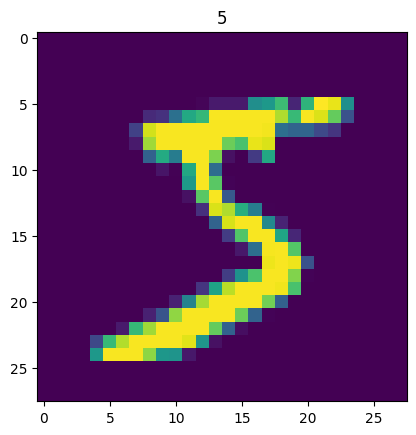

In [38]:
img = x_train[0].reshape(28,28)
plt.imshow(img)
plt.title(str(y_train[0]))
plt.show()

In [39]:
batch1 = x_train[:128]
batch2 = x_train[128:256]
batch1.shape, batch2.shape

((128, 784), (128, 784))

In [41]:
batches = []
for i in range(int(len(x_train)/128)):
    batches.append(x_train[i*128:(i+1)*128])
len(batches)

468

## 연산

In [43]:
def add(x2d, y2d):
    r2d = x2d.copy()
    for i in range(x2d.shape[0]):
        for j in range(x2d.shape[1]):
            r2d[i,j] = x[i,j] + y2d[i,j]
    return r2d

In [44]:
x = np.random.random((3,3))
y = np.random.random((3,3))
print(x)
print(y)
add(x,y)

[[0.00504762 0.44042086 0.50085461]
 [0.31211778 0.3992543  0.59301375]
 [0.67328469 0.18959538 0.49457939]]
[[0.40546172 0.99631598 0.36712757]
 [0.24643148 0.80958182 0.41787211]
 [0.48545138 0.25792212 0.35799249]]


array([[0.41050934, 1.43673684, 0.86798219],
       [0.55854927, 1.20883612, 1.01088587],
       [1.15873607, 0.4475175 , 0.85257188]])

In [45]:
x = np.random.random((28,28))
y = np.random.random((28,28))
x+y

array([[0.05709664, 0.91003837, 1.17762936, 0.96096064, 0.49185729,
        0.18309535, 1.33014121, 0.61673531, 1.64439498, 0.56478269,
        0.16590736, 0.59302725, 1.57283488, 1.31290471, 0.60607145,
        1.5159959 , 0.41479762, 0.84234613, 0.1605018 , 0.73628657,
        1.42382629, 0.55064362, 1.62750425, 0.96936394, 0.56309756,
        1.52937704, 0.62725029, 0.69925572],
       [1.03151121, 1.14448466, 1.39685558, 0.8737819 , 1.72252043,
        1.19486521, 1.4019887 , 0.81850039, 0.82390775, 0.83161455,
        1.54321153, 0.55646249, 1.59647307, 0.90952869, 0.90788738,
        1.19633226, 0.71288834, 1.71504478, 1.29472352, 1.00865363,
        1.76916475, 0.74288624, 1.09524079, 1.86849224, 1.23339815,
        1.23157139, 1.05119092, 0.72913148],
       [0.52242983, 1.14904267, 0.90996211, 0.95190127, 0.28117982,
        1.2721981 , 1.27100239, 1.11728493, 0.84202045, 1.49892477,
        1.28756966, 1.42550239, 0.24455576, 0.34455764, 1.68287123,
        1.72719852, 0.9319

In [46]:
st = time.time()
for _ in range(10000):
    z = x + y
et = time.time()
print(f'{et-st:.5f}')

0.02285


In [47]:
st = time.time()
for _ in range(10000):
    z = add(x,y)
et = time.time()
print(f'{et-st:.5f}')

6.71953


In [48]:
def dot(x,y):
    r = np.zeros((x.shape[0],y.shape[1]))
    for i in range(x.shape[0]):
        s = 0
        for j in range(x.shape[1]):
            s += x[i,j] * y[j]
        r[i] = s
    return r

In [49]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[1],[1],[3]])
x.shape, y.shape

((2, 3), (3, 1))

In [50]:
dot(x,y)

array([[12.],
       [27.]])